In [1]:
from IPython import get_ipython


def type_of_script():
    """
    Detects and returns the type of python kernel
    :return: string 'jupyter' or 'ipython' or 'terminal'
    """
    try:
        ipy_str = str(type(get_ipython()))
        if 'zmqshell' in ipy_str:
            return 'jupyter'
        if 'terminal' in ipy_str:
            return 'ipython'
    except:
        return 'terminal'


if type_of_script() == 'jupyter':
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm
    
import matplotlib.pyplot as plt # type: module
import matplotlib.ticker as ticker
from matplotlib import colormaps
from matplotlib.colors import Normalize
import matplotlib.gridspec as gridspec

import numpy as np
import os, glob
import time
import warnings

from rur.fortranfile import FortranFile
from rur import uri, uhmi, painter, drawer
from rur.sci.photometry import measure_luminosity
from rur.sci.geometry import get_angles, euler_angle
from rur.utool import rotate_data
from scipy.ndimage import gaussian_filter
uri.timer.verbose=1
# from rur.sci.kinematics import f_getpot

from icl_IO import mode2repo, pklsave, pklload
from icl_tool import *
from icl_numba import large_isin, large_isind, isin
from icl_draw import drawsnap, add_scalebar, addtext, MakeSub_nolabel, label_to_in, fancy_axis, circle
import argparse, subprocess
from importlib import reload
import cmasher as cmr
from copy import deepcopy
from multiprocessing import Pool, shared_memory

mode = 'nh'
iout = 1026
repo, rurmode, dp = mode2repo(mode)
snap = uri.RamsesSnapshot(repo, iout, mode=rurmode)
snaps = uri.TimeSeries(snap)
snaps.read_iout_avail()
nout = snaps.iout_avail['iout']
gals = uhmi.HaloMaker.load(snap, galaxy=True, double_precision=dp)
hals = uhmi.HaloMaker.load(snap, galaxy=False, double_precision=dp)
database = f"/home/jeon/MissingSat/database"

from common_func import *

[Output 01026] Age (Gyr) : 11.624 / 13.741, z = 0.17149 (a = 0.8536)


In [4]:
LG = pklload(f"{database}/LG")

In [18]:
0.5*(494+722)

608.0

In [21]:
722-494

228

In [17]:
10**10.8 / 1e10

6.309573444801942

True 1 0.9387067900523499 0.6008435789735361


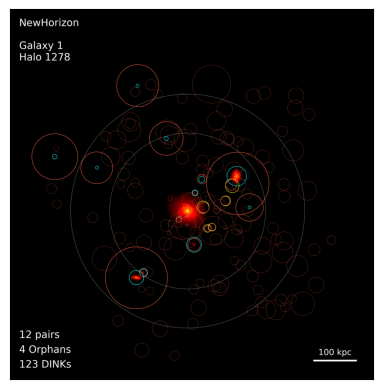

False 2 3.892723028483922 4.101849253186763
True 3 0.29130579551859065 0.28047806312632445


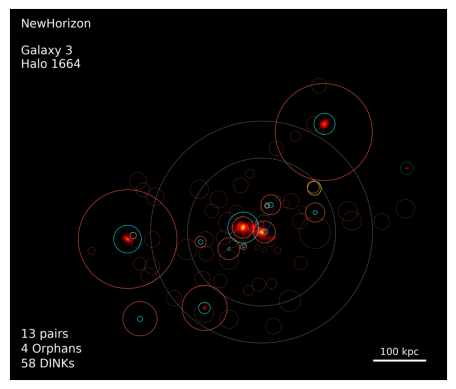

False 4 3.9181257669999106 3.195968732085862
True 7 0.6492386728029168 0.5994104439280188


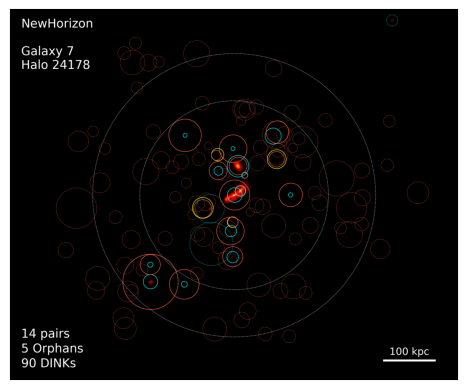

True 8 1.3397089812052456 0.8410043299835387


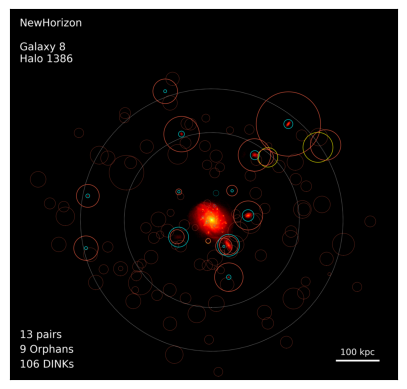

False 9 3.225980258799522 1.8473475196796143
True 10 1.2623430566945095 0.8168567342382008


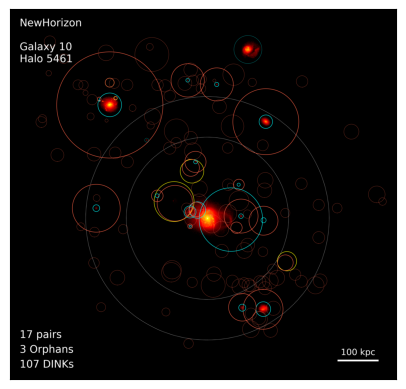

False 14 2.9072442549706112 2.5262206057812464
False 17 0.17455881926223268 0.15543878542223658
True 23 0.5652578063902203 0.36035161657697


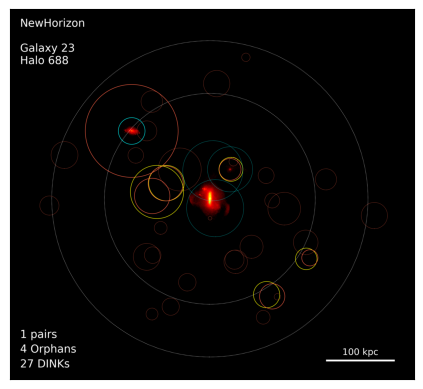

False 24 0.24385134402469946 0.11159496124781179
True 25 1.4552060939343452 1.0895400827557


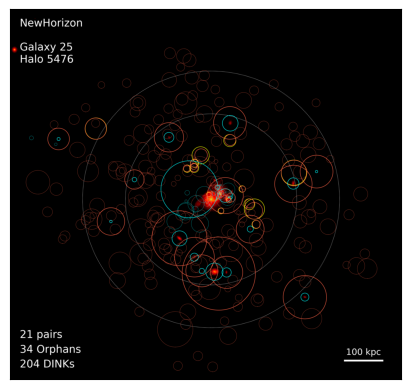

True 26 0.42929508915862374 0.31886377543320266


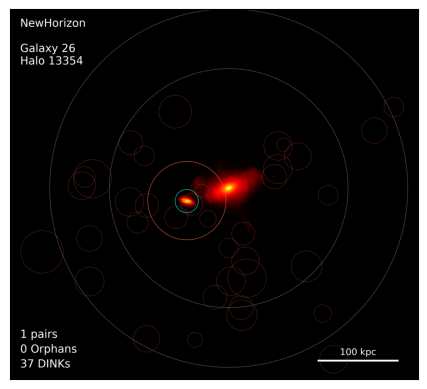

False 29 0.20879062559309766 0.3219713168317059
False 35 0.20480014684737033 0.08529501190808897
True 36 0.46909543782253627 0.40078044743104824


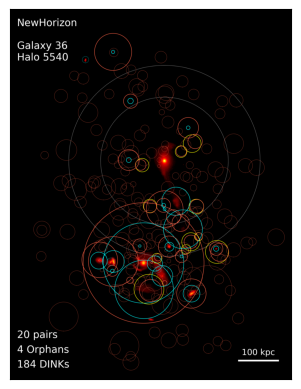

False 37 0.19839854908028326 0.11864288812123415
False 40 0.15447661725014794 0.0823070120958836
False 46 0.24098443483680868 0.1167268376233344
False 47 0.1850055550533331 0.11990308384300367
False 52 0.18932007167246032 0.09982797097684297
False 63 0.18457436175062247 0.1732213528219025
True 64 0.505527389097751 0.41299688921780275


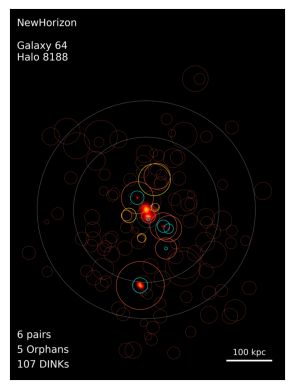

False 75 0.15780188901803446 0.12437110491538786
False 84 0.17423134632748447 0.07785047028477837
False 107 0.2045421854160245 0.10038679262359997
False 108 0.20271535153236808 0.11422090306835564
True 121 0.5756899529519247 0.23854241221369507


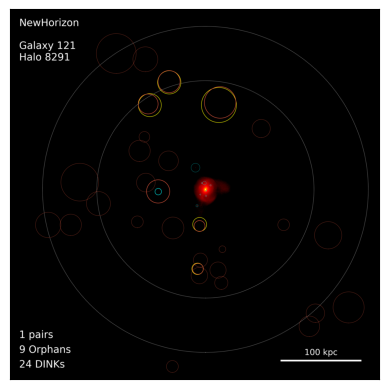

True 129 0.2534385340012991 0.23381677343105575


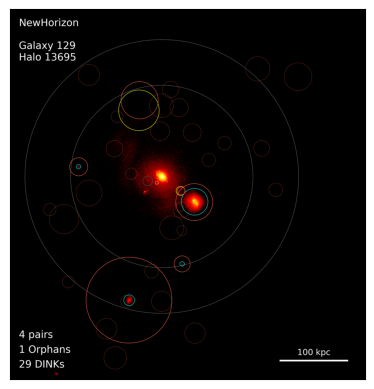

False 207 0.15345867026625093 0.09608738581327936
True 11 0.4324153380384574 0.3205775864289886


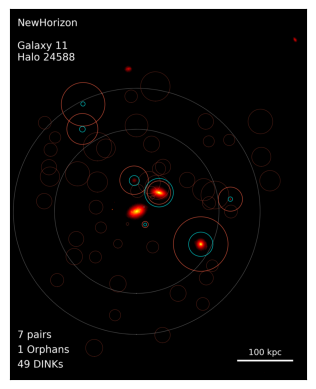

In [22]:
MWmass = 6.08e10; dMW = (7.22-4.94) * 10**10
sm1 = MWmass-2*dMW; sm2 = MWmass+2*dMW
lm1 = 2e11; lm2 = 2e13
for key in LG.keys():
    BGG = LG[key]['BGG']
    if (sm1 < BGG['m'] < sm2) and (lm1 < BGG['m200'] < lm2):
        print(True,key, BGG['m']/MWmass, BGG['m200']/2e12)
        fig,ax = fancy_axis(dpi=100)
        load_LGimg(key, ax=ax)
        plt.show()
        plt.close()
    else:
        print(False,key, BGG['m']/MWmass, BGG['m200']/2e12)
    